In [11]:
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
from collections import defaultdict
import math
import scipy as sp
import sympy, control
from scipy import signal as sg
import numpy as np
import sys
import os
import seaborn as sb

In [10]:
    from scipy.signal import (freqz, butter, bessel, cheby1, cheby2, ellip, 
                              tf2zpk, zpk2tf, lfilter, buttap, bilinear, cheb2ord, cheb2ap
                              )
    from numpy import asarray, tan, array, pi, arange, cos, log10, unwrap, angle
    from matplotlib.pyplot import (stem, title, grid, show, plot, xlabel, 
                                  ylabel, subplot, xscale, figure, xlim, 
                                  margins)

# Q1 

```
1. Investigate how well the all-zero systems approximate the single pole system
The single pole system with a pole at a has a system function of

HH(zz) = 1
1 − aazz−1 = �aannzz−nn
∞

nn=0

It can be approximated with a finite number of zeros with a system function of

HHNN(zz) = �aannzz−nn
NN
nn=0

Compute and plot the impulse response and the magnitude response of the systems
HH(zz) and HHNN(zz) for a = 0.8, 0.95 and N = 8, 16, 64. Please comment on your results.
```

### Zero Pole Diagram for 1/(1-az^(-1))


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k



# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.

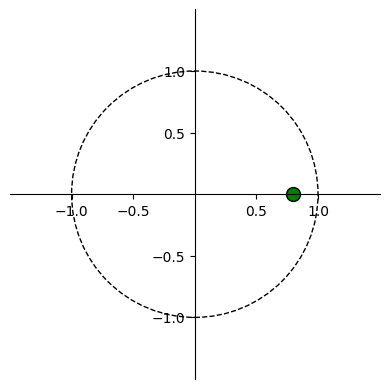

(array([0.8]), array([], dtype=float64), 1.0)

In [16]:
## Z-Transform for a = 0.8
a=np.array([1])
b = np.array([1,-0.8])
zplane(b,a)

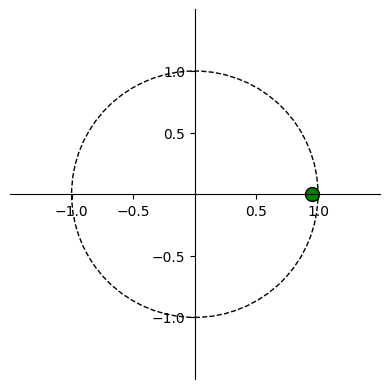

(array([0.95]), array([], dtype=float64), 1.0)

In [17]:
## Z-Transform for a = 0.95
a=np.array([1])
b = np.array([1,-0.95])
zplane(b,a)

## Impulse Response

In [53]:
import sympy
sympy.init_printing()


import tbcontrol
tbcontrol.expectversion('0.1.2')
s, z = sympy.symbols('s, z')
k = sympy.Symbol('k', integer=True)
Dt = sympy.Symbol('\Delta t', positive=True)

In [50]:
#Z-Transform of Impulse Function
xz =1

In [51]:
den,num = sympy.symbols('a1, b1')

### a=0.8, N = 8, 16, 64.

In [74]:
# For a =0.8
den =-0.8
hz = 1/(1 + den*z**-1) #(1/1+den*z^-1)
hz.cancel()

In [75]:
q = sympy.symbols('q')
def qsubs(fz):
    return fz.subs({z: q**-1})

In [76]:

#Output in z Domain yz = xz*hz
yz = xz*hz
qsubs(yz)

In [77]:
N =8
qpoly = sympy.Poly(qsubs(yz).series(q, 0, N).removeO(), q)
qpoly

<StemContainer object of 3 artists>

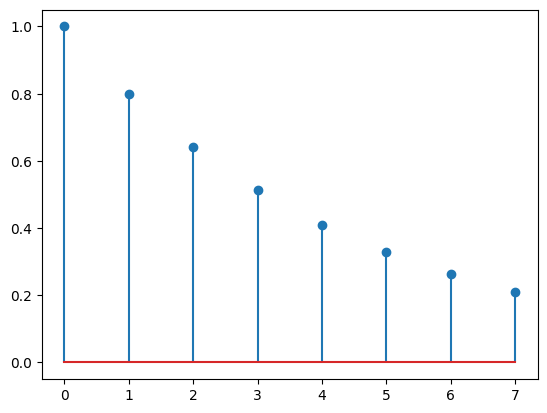

In [78]:
responses = list(reversed(qpoly.all_coeffs()))
import tbcontrol.symbolic
responses = tbcontrol.symbolic.sampledvalues(yz, z, N)
%matplotlib inline

sampledt = np.arange(N)
smootht = np.linspace(0, N)
plt.stem(sampledt, np.array(responses, dtype=float))

In [79]:
N =16
qpoly = sympy.Poly(qsubs(yz).series(q, 0, N).removeO(), q)
qpoly

<StemContainer object of 3 artists>

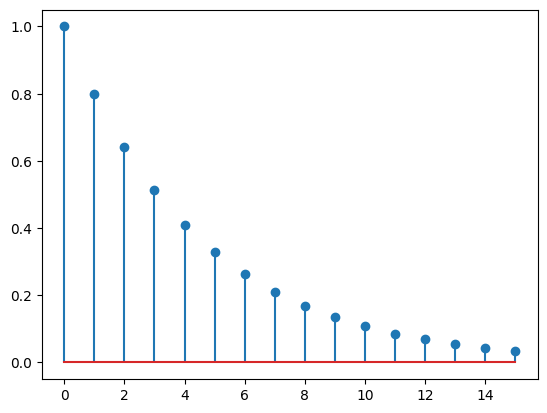

In [80]:
responses = list(reversed(qpoly.all_coeffs()))
import tbcontrol.symbolic
responses = tbcontrol.symbolic.sampledvalues(yz, z, N)
%matplotlib inline

sampledt = np.arange(N)
smootht = np.linspace(0, N)
plt.stem(sampledt, np.array(responses, dtype=float))

<StemContainer object of 3 artists>

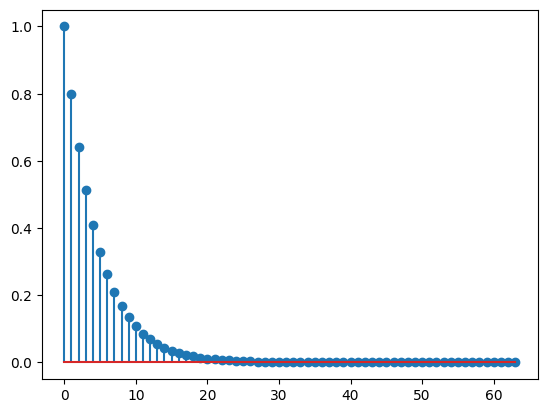

In [81]:
N =64
qpoly = sympy.Poly(qsubs(yz).series(q, 0, N).removeO(), q)
qpoly
responses = list(reversed(qpoly.all_coeffs()))
import tbcontrol.symbolic
responses = tbcontrol.symbolic.sampledvalues(yz, z, N)
%matplotlib inline

sampledt = np.arange(N)
smootht = np.linspace(0, N)
plt.stem(sampledt, np.array(responses, dtype=float))

### a=0.95, N = 8, 16, 64.

In [82]:
den =-0.95
hz1 = 1/(1 + den*z**-1) #(1/1+den*z^-1)
hz.cancel()
yz1 = hz*xz

In [83]:
yz1 = xz*hz1
qsubs(yz)

<StemContainer object of 3 artists>

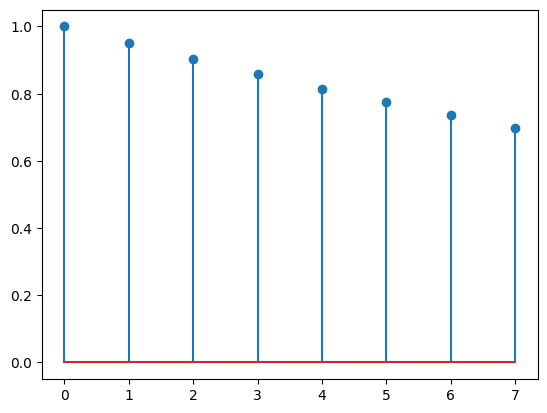

In [84]:
N =8
qpoly = sympy.Poly(qsubs(yz1).series(q, 0, N).removeO(), q)
qpoly
responses = list(reversed(qpoly.all_coeffs()))
import tbcontrol.symbolic
responses = tbcontrol.symbolic.sampledvalues(yz1, z, N)
%matplotlib inline

sampledt = np.arange(N)
smootht = np.linspace(0, N)
plt.stem(sampledt, np.array(responses, dtype=float))

<StemContainer object of 3 artists>

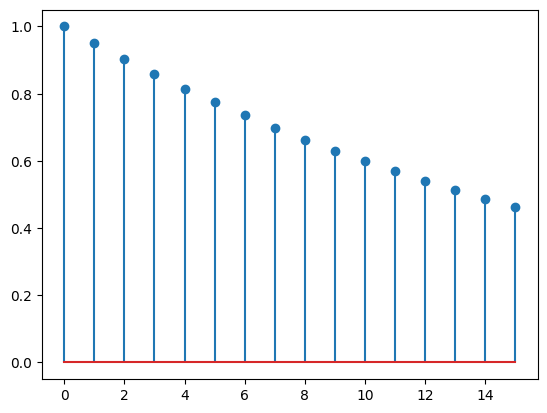

In [85]:
N =16
qpoly = sympy.Poly(qsubs(yz1).series(q, 0, N).removeO(), q)
qpoly
responses = list(reversed(qpoly.all_coeffs()))
import tbcontrol.symbolic
responses = tbcontrol.symbolic.sampledvalues(yz1, z, N)
%matplotlib inline

sampledt = np.arange(N)
smootht = np.linspace(0, N)
plt.stem(sampledt, np.array(responses, dtype=float))

<StemContainer object of 3 artists>

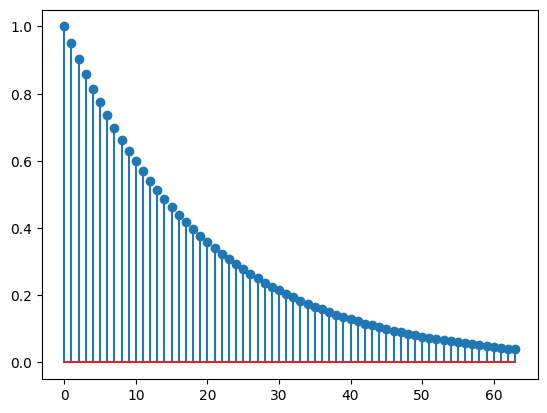

In [86]:
N =64
qpoly = sympy.Poly(qsubs(yz1).series(q, 0, N).removeO(), q)
qpoly
responses = list(reversed(qpoly.all_coeffs()))
import tbcontrol.symbolic
responses = tbcontrol.symbolic.sampledvalues(yz1, z, N)
%matplotlib inline

sampledt = np.arange(N)
smootht = np.linspace(0, N)
plt.stem(sampledt, np.array(responses, dtype=float))

## Magnitude, Phase Response

### 1/1-a(exp^(-j*w))

### a=0.8



In [96]:
import scipy
w,h = scipy.signal.freqz(1,[1,-0.8])

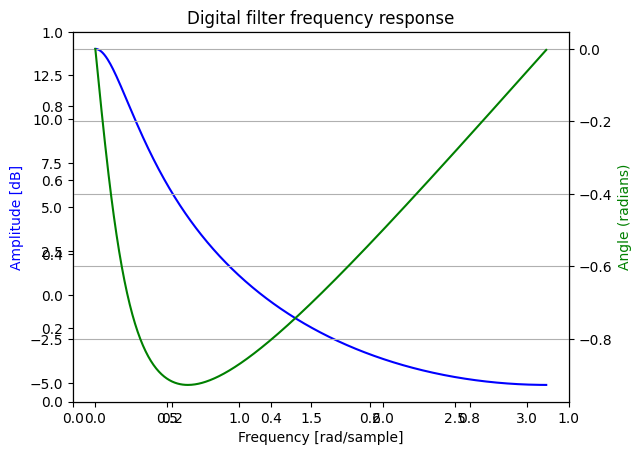

In [97]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

### a=0.95

In [98]:
w,h = scipy.signal.freqz(1,[1,-0.95])

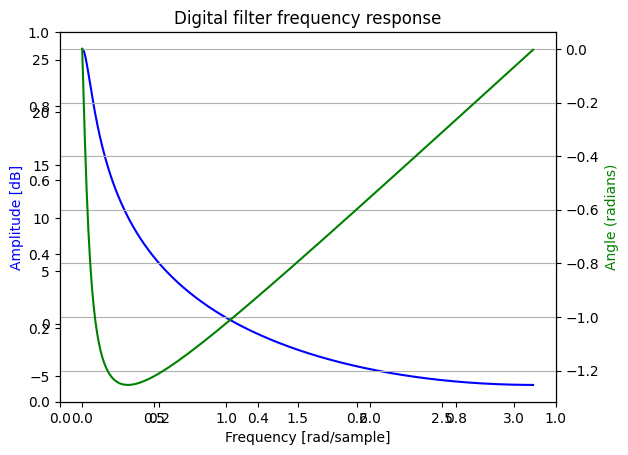

In [99]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

# Q2

2. Consider the following AP(3) model: xx(nn) = 0.98xx(nn − 3) + ww(nn) , where ww(nn) ∼
WWWWWW(0, 1).
(a) Plot the PSD of xx(nn) and check if the obtained process is going to exhibit a
pseudoperiodic behavior.
(b) Generate and plot 100 samples of the process. Does the graph support the conclusion
of part (a)? If yes, what is the period?
(c) Compute and plot the PSD of the process yy(nn) = 1

3 [xx(nn − 1) + xx(nn) + xx(nn + 1)].
(d) Repeat part (bb) and explain the difference between the behavior of processes xx(nn)
and yy(nn).

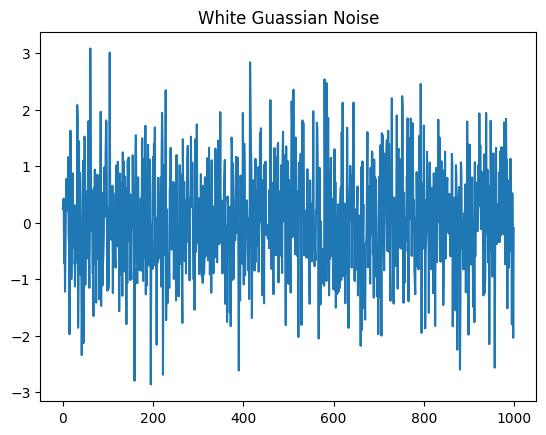

In [151]:
#x(n) = 0.98*x(n-3)+w(n)
#Defining w
import numpy
import matplotlib.pyplot as plt

mean = 0
std = 1 
num_samples = 1000
w = numpy.random.normal(mean, std, size=num_samples)
plt.title('White Guassian Noise')

plt.plot(w)

plt.show()

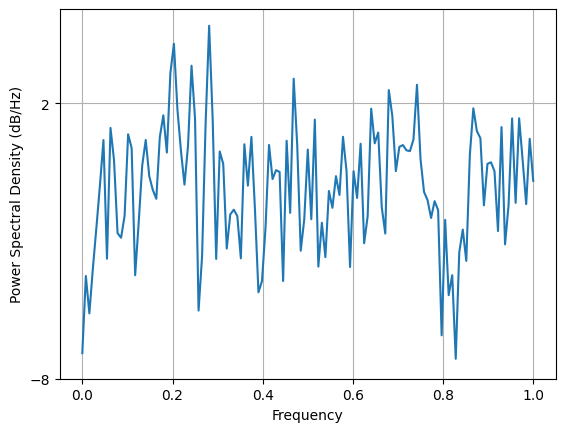

In [153]:
plt.psd(w)
plt.show()

#### AP3 Model
hz = d0/(1+a1*z^(-1)+a2*z^(-2)+a3*z^(-3))

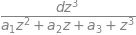

In [113]:
d,a1,a2,a3 = sympy.symbols('d,a1,a2,a3')
hz = d/(1 + a1*z**-1+a2*z**-2+a3*z**-3) #(1/1+den*z^-1)
hz.cancel()

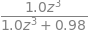

In [116]:
# Based on Expression
a1=a2=0
a3 = 0.98
d=1
hz = 1/(1 +0.98*z**-3)
hz.cancel()

In [154]:
#Draw Random signal x(n) from Gaussian Distribution

from scipy.stats import norm
x = norm.rvs(loc=0,scale=1,size=1000)
x1 = norm.rvs(loc=3,scale=0.980,size=1000)

(array([0.01477962, 0.01477962, 0.03325415, 0.08128791, 0.09606753,
        0.12932168, 0.20321978, 0.31776185, 0.37318542, 0.40274466,
        0.38427014, 0.38057523, 0.29559241, 0.34732109, 0.19582997,
        0.14779621, 0.12193187, 0.04433886, 0.06650829, 0.01847453,
        0.02216943, 0.00369491]),
 array([0.15381014, 0.42445308, 0.69509602, 0.96573895, 1.23638189,
        1.50702483, 1.77766777, 2.04831071, 2.31895365, 2.58959659,
        2.86023953, 3.13088247, 3.40152541, 3.67216835, 3.94281129,
        4.21345423, 4.48409717, 4.75474011, 5.02538305, 5.29602599,
        5.56666893, 5.83731187, 6.10795481]),
 [<matplotlib.patches.Polygon at 0x2827eddb0>])

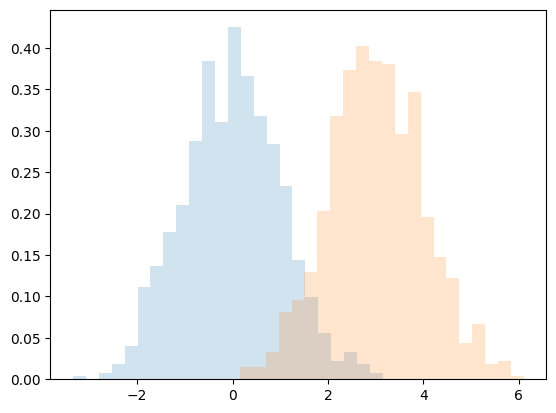

In [155]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.hist(x, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.hist(x1, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

In [156]:
# Adding signals

res = x1+w

(array([0.00274746, 0.        , 0.        , 0.01648475, 0.02747458,
        0.05494916, 0.0851712 , 0.12638308, 0.17583732, 0.20880682,
        0.23353395, 0.26100853, 0.30496786, 0.29397803, 0.28573565,
        0.17858478, 0.17583732, 0.10440341, 0.08791866, 0.06868645,
        0.02747458, 0.00824237, 0.01098983, 0.00549492, 0.00274746]),
 array([-1.50930573, -1.14533295, -0.78136016, -0.41738738, -0.0534146 ,
         0.31055818,  0.67453097,  1.03850375,  1.40247653,  1.76644932,
         2.1304221 ,  2.49439488,  2.85836766,  3.22234045,  3.58631323,
         3.95028601,  4.31425879,  4.67823158,  5.04220436,  5.40617714,
         5.77014993,  6.13412271,  6.49809549,  6.86206827,  7.22604106,
         7.59001384]),
 [<matplotlib.patches.Polygon at 0x282721cc0>])

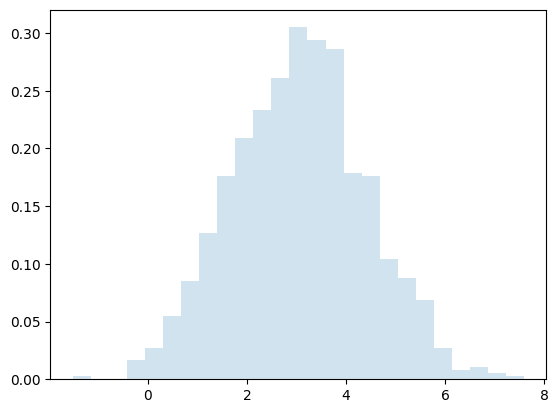

In [157]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.hist(res, density=True, bins='auto', histtype='stepfilled', alpha=0.2)


In [158]:
res.shape
res.size

## PSD


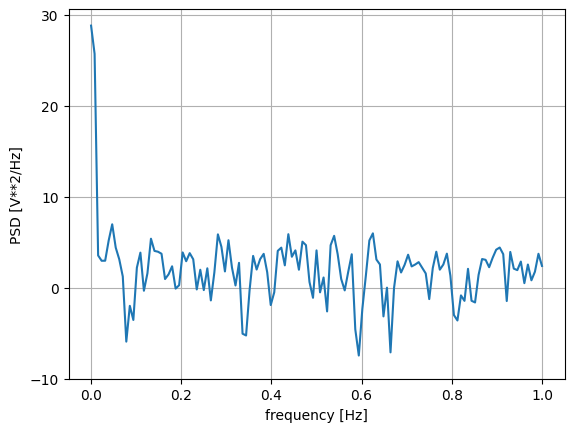

In [160]:
import matplotlib.pyplot as plt

plt.psd(res)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

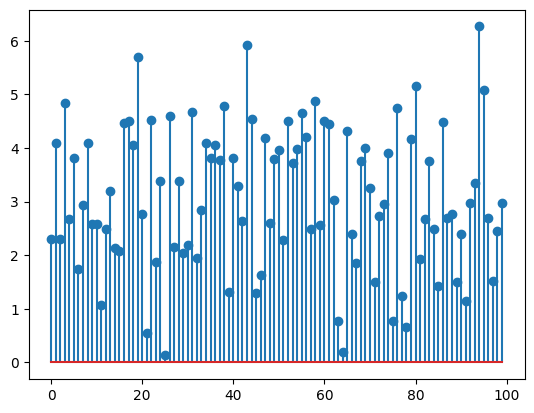

In [162]:
x1 = norm.rvs(loc=3,scale=0.980,size=100)
w1 = numpy.random.normal(mean, std, size=100)
res1 = x1+w1
plt.stem(res1)
plt.show()

### Y(n)

(array([0.23725018, 0.35587527, 0.41518781, 0.83037563, 1.36418853,
        1.06762581, 0.88968817, 0.47450036, 0.29656272]),
 array([-1.78288352, -1.61428512, -1.44568672, -1.27708833, -1.10848993,
        -0.93989153, -0.77129314, -0.60269474, -0.43409634, -0.26549794]),
 [<matplotlib.patches.Polygon at 0x283bf4f70>])

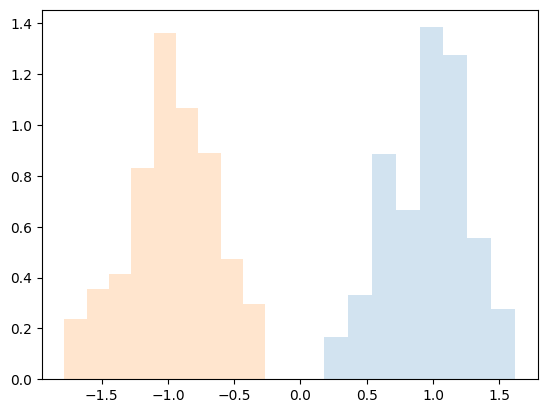

In [170]:
x2 = norm.rvs(loc=1,scale=0.333,size=100)
x3 = norm.rvs(loc=-1,scale=0.333,size=100)
x4 = norm.rvs(loc=0,scale=0.333,size=100)
y = x2+x3+x4
fig, ax = plt.subplots(1, 1)
ax.hist(x2, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.hist(x3, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

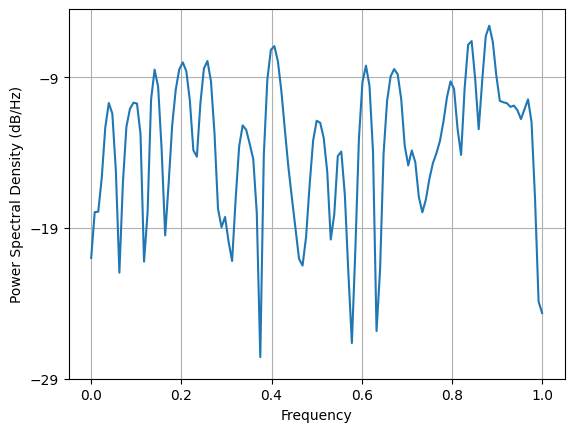

In [164]:
plt.psd(y)
plt.show()

<StemContainer object of 3 artists>

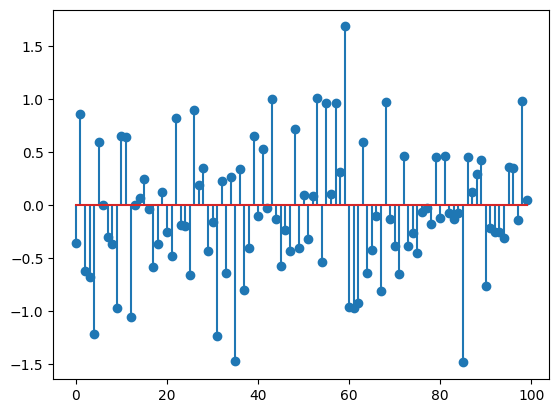

In [165]:
plt.stem(y)

(array([0.12623072, 0.1577884 , 0.37869215, 0.63115358, 0.7573843 ,
        0.41024983, 0.37869215, 0.28401911, 0.        , 0.03155768]),
 array([-1.48269802, -1.16581793, -0.84893785, -0.53205777, -0.21517768,
         0.1017024 ,  0.41858249,  0.73546257,  1.05234266,  1.36922274,
         1.68610283]),
 [<matplotlib.patches.Polygon at 0x283b788b0>])

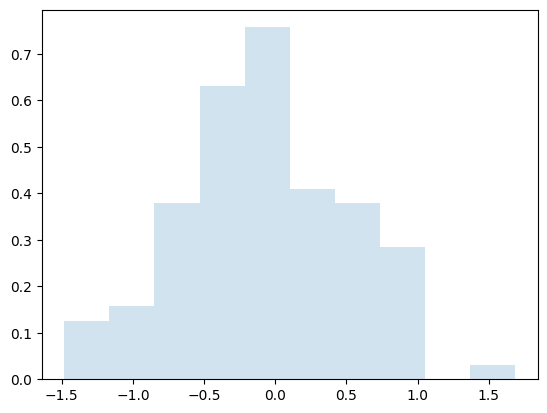

In [169]:
fig, ax = plt.subplots(1, 1)
ax.hist(y, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
